## Basic Usage

In [14]:
# Libraries Importtaion
from PIL import Image
import imagehash

# Set image path
image_path = 'data_subset/1972.jpg'
# Read our image
read_image = Image.open(image_path)
# Generate image hash value
hash_value = imagehash.average_hash(read_image)
# print image hash value
print(hash_value)

e7e7e7dfd99d8181


In [6]:
from PIL import Image
import imagehash
import glob
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [7]:
dataset_path = "data_subset/"

images_list = list()
hash_images_list = list()

for image_file in glob.glob(dataset_path+"*.jpg"):
    cal_hash =  imagehash.average_hash(Image.open(image_file))
    images_list.append(image_file)
    hash_images_list.append(cal_hash)
print("--DONE--")

--DONE--


In [11]:
# Calculate hash value between target image and our database

target_image = "dataset/images/2370.jpg"
hash_target_image =  imagehash.average_hash(Image.open(target_image))

result_list = list()
for i in hash_images_list:
    result_list.append(i-hash_target_image)


In [12]:
index_list = []
hash_values = []

for index , i in enumerate(result_list):
    #print(index,i)
    index_list.append(index)
    hash_values.append(i)

# Create a dictionary  to save hash values and their indexes
mydict = dict(zip(index_list, hash_values) )

# Sort above dictionary from lowest to highest 
sorted_dict = dict(sorted(mydict.items(), key=lambda x:x[1]))

# Extract indexes to retreive similar images
dictkeys = list(sorted_dict.keys())

# Retrieve our Top K similar images
top_k_similar = dictkeys[:6]


Target Image


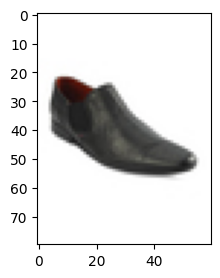

Top K Similar Images


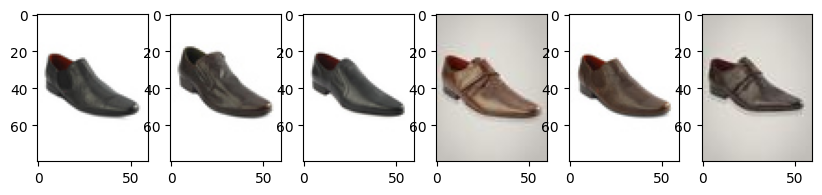

In [13]:
# Create a function to display images
def display_image(image):
    input_image = cv2.imread(image)
    input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(3,3))
    plt.imshow(input_image)
    plt.show()

print("Target Image")
display_image(target_image)

print("Top K Similar Images")

# Map indexes of Top K similar images for display
#for i in top_k_similar:
    #display_image(images_list[i])


# Load the images
img0 = plt.imread(images_list[top_k_similar[0]])
img1 = plt.imread(images_list[top_k_similar[1]])
img2 = plt.imread(images_list[top_k_similar[2]])
img3 = plt.imread(images_list[top_k_similar[3]])
img4 = plt.imread(images_list[top_k_similar[4]])
img5 = plt.imread(images_list[top_k_similar[5]])

# Display the images in a grid
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(10,2))
axes[0].imshow(img0)
axes[1].imshow(img1)
axes[2].imshow(img2)
axes[3].imshow(img3)
axes[4].imshow(img4)
axes[5].imshow(img5)
plt.show()